In [ ]:
colab = True#False#

In [ ]:

if(colab == True):
  '''#!pip install -q -U transformers==4.37.2
  #!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
  !pip install transformers
  !pip install accelerate
  !pip install bitsandbytes'''

  !pip install transformers
  !pip install accelerate
  !pip install bitsandbytes
  !pip install joblib==1.4.2
  !pip install langchain==0.0.162
  !pip install langchain-core==0.2.43
  !pip install numpy==1.26.4
  !pip install openai==0.27.4
  !pip install pandas==1.5.3
  !pip install python-dotenv==1.0.0
  !pip install scikit-learn==1.5.1
  !pip install tenacity==8.2.2
  !pip install tiktoken==0.8.0
  !pip install transformers==4.46.2
  !pip install wikipedia==1.4.0
  !pip install torch
  !pip3 install git+https://github.com/openai/CLIP.git
  !pip install lpips
  !pip install PIL



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import clip
from PIL import Image
import torch.nn as nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 97.9MiB/s]


In [ ]:
sameImages = ["/content/cat_orange_grass(1).jpg", "cat_orange_grass_onePixelChange(1).jpg", "cat_orange_grass_onePixelChange(2).jpg", "cat_orange_grass_onePixelChange(3).jpg", "cat_orange_grass_onePixelChange(4).jpg", "/content/cat_orange_grass(2).jpg"]
similarImages = ["/content/cat_orange_grass_NotSame(1).jpg", "/content/cat_orange_grass_NotSame(2).jpg", "/content/cat_orange_grass_NotSame(3).jpg", "/content/cat_orange_grass_NotSame(4).jpg"]
notSimilarImages = ["/content/cat_orange_grass_NotSimilar(1).jpg"]
differentImages = ["different(1).jpg", "different(2).jpg", "different(3).jpg", "different(4).jpg", "different(5).jpg", "different(6).jpg", "different(7).jpg", "different(8).jpg", "different(9).jpg"]

In [ ]:
image1 = sameImages[0]
image2 = similarImages[0]
#image2 = image1
#image1 = "/content/inImg_bridge1.png"
#image2 = "/content/outImg_bridge1_1.png"

#image1 = differentImages[2]
#image2 = differentImages[8]

In [ ]:


from PIL import Image
cos = torch.nn.CosineSimilarity(dim=0)

image1_preprocess = preprocess(Image.open(image1)).unsqueeze(0).to(device)
image1_features = model.encode_image( image1_preprocess)


image2_preprocess = preprocess(Image.open(image2)).unsqueeze(0).to(device)
image2_features = model.encode_image( image2_preprocess)

simSCore_CLIP1 = cos(image1_features[0],image2_features[0]).item()
simSCore_CLIP1 = (simSCore_CLIP1+1)/2
print("Image similarity", simSCore_CLIP1)

Image similarity 0.943603515625


In [ ]:
from PIL import Image
cos = torch.nn.CosineSimilarity(dim=0)

image1_preprocess = preprocess(Image.open(image1)).unsqueeze(0).to(device)
image1_features = model.encode_image( image1_preprocess)
image1_features_normalized = image1_features / image1_features.norm(dim=-1, keepdim=True)

image2_preprocess = preprocess(Image.open(image2)).unsqueeze(0).to(device)
image2_features = model.encode_image( image2_preprocess)
image2_features_normalized = image2_features / image2_features.norm(dim=-1, keepdim=True)

simSCore_CLIP1_normalized = cos(image1_features_normalized[0],image2_features_normalized[0]).item()
#simSCore_CLIP1_normalized = torch.nn.functional.cosine_similarity(image1_features, image2_features).item()#for some reason this doesn't change the score at all

simSCore_CLIP1_normalized = (simSCore_CLIP1_normalized+1)/2
print("Image similarity", simSCore_CLIP1_normalized)

Image similarity 0.943603515625


Same exact images that get a similarity score less than 1.0

differentImages[2]: Image similarity 0.999755859375
(Base)

differentImages[6]: Image similarity 0.999755859375
(Horizontal flip)

differentImages[8]: Image similarity 0.999755859375
(Vertical & Horizontal flip)




Abstract art

Same: Image similarity 0.999755859375

90 degre: Image similarity 0.95849609375

180 degree: Image similarity 0.971435546875

270 degree: Image similarity 0.952392578125


horizontal flip: Image similarity 0.989013671875

vertical flip: Image similarity 0.982421875

horizontaal & vertical flip: Image similarity 0.97119140625

Abstract art (First/base image = 90 degree)

Same: Image similarity 1.0

90 degre: Image similarity 0.94970703125

180 degree: Image similarity 0.990966796875

270 degree: Image similarity 0.990966796875

horizontal flip:
vertical flip:
horizontaal & vertical flip:

 similarity 0.999755859375
 similarity 0.999755859375

 Image similarity 0.795166015625
 Image similarity 0.76416015625
Image similarity 0.75390625

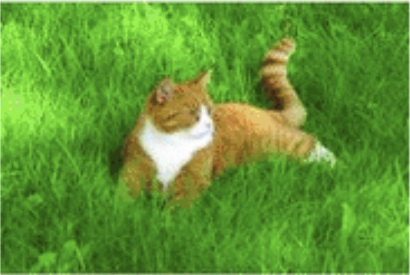

In [ ]:
#print image1
from IPython.display import Image
Image(filename=image1)

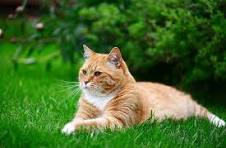

In [ ]:
#print image2
from IPython.display import Image
Image(filename=image2)

In [ ]:
import torch
import clip
from PIL import Image

# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


In [ ]:
def get_clip_embedding_path(image_path):
    image = Image.open(image_path).convert("RGB")
    image = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)

    return image_features / image_features.norm(dim=-1, keepdim=True)  # Normalize
def get_clip_embedding(inImage):
    image = inImage
    image = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)

    return image_features / image_features.norm(dim=-1, keepdim=True)  # Normalize




In [ ]:
# Example usage
image1_features = get_clip_embedding_path(image1)
image2_features = get_clip_embedding_path(image2)

In [ ]:
cosine_similarity_CLIP = torch.nn.functional.cosine_similarity(image1_features, image2_features).item()
print(f"Similarity Score: {cosine_similarity_CLIP:.4f}")


Similarity Score: 0.8872


In [ ]:
import torchvision.transforms as transforms

# Load images
transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
img1 = transform(Image.open(image1)).unsqueeze(0)
img2 = transform(Image.open(image2)).unsqueeze(0)

In [ ]:
import torch
import lpips
from PIL import Image
import torchvision.transforms as transforms

# Load LPIPS model
lpips_model_alex = lpips.LPIPS(net='alex')  # Use 'vgg' for VGG features



# Compute LPIPS distance (lower = more similar)
lpips_score_alex = lpips_model_alex(img1, img2).item()
lpips_simScore_alex = 1 - lpips_score_alex  # Convert to similarity score (higher = more similar)
print(f"LPIPS Perceptual Similarity Score: {lpips_score_alex}")


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 183MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


/usr/local/lib/python3.11/dist-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location='cpu'), st

LPIPS Perceptual Similarity Score: 0.5349435806274414


In [ ]:
import torch
import lpips
from PIL import Image
import torchvision.transforms as transforms

# Load LPIPS model
loss_fn_vgg = lpips.LPIPS(net='vgg')  # 'alex', 'vgg', or 'squeeze' network


# Compute perceptual similarity
lpips_score_vgg = loss_fn_vgg(img1, img2).item()
lpips_simScore_vgg = 1 - lpips_score_vgg  # Convert to similarity score (higher = more similar)
print(f"LPIPS Perceptual Similarity: {lpips_score_vgg}")


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 151MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/vgg.pth
LPIPS Perceptual Similarity: 0.5874283313751221


In [ ]:
import torch
import lpips
from PIL import Image
import torchvision.transforms as transforms

# Load LPIPS model
loss_fn_squeeze = lpips.LPIPS(net='squeeze')  # 'alex', 'vgg', or 'squeeze' network


# Compute perceptual similarity
lpips_score_squeeze = loss_fn_squeeze(img1, img2).item()
lpips_simScore_squeeze = 1 - lpips_score_squeeze  # Convert to similarity score (higher = more similar)
print(f"LPIPS Perceptual Similarity: {lpips_score_squeeze}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth


Setting up [LPIPS] perceptual loss: trunk [squeeze], v[0.1], spatial [off]


100%|██████████| 4.73M/4.73M [00:00<00:00, 112MB/s]

Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/squeeze.pth


LPIPS Perceptual Similarity: 0.3774946928024292


In [ ]:
print(f"LPIPS Perceptual Similarity Score (Alex): {lpips_score_alex}")
print(f"LPIPS Perceptual Similarity Score (VGG): {lpips_score_vgg}")
print(f"LPIPS Perceptual Similarity Score (Squeeze): {lpips_score_squeeze}")

LPIPS Perceptual Similarity Score (Alex): 0.5349435806274414
LPIPS Perceptual Similarity Score (VGG): 0.5874283313751221
LPIPS Perceptual Similarity Score (Squeeze): 0.3774946928024292


In [ ]:
print(f"LPIPS Perceptual Similarity (Alex): {lpips_simScore_alex}")
print(f"LPIPS Perceptual Similarity (VGG): {lpips_simScore_vgg}")
print(f"LPIPS Perceptual Similarity (Squeeze): {lpips_simScore_squeeze}")

LPIPS Perceptual Similarity (Alex): 0.4650564193725586
LPIPS Perceptual Similarity (VGG): 0.41257166862487793
LPIPS Perceptual Similarity (Squeeze): 0.6225053071975708


In [ ]:
print("Image similarity", simSCore_CLIP1)
print("Image similarity", simSCore_CLIP1_normalized)
print(f"Similarity Score: {cosine_similarity_CLIP:.4f}")

Image similarity 0.943603515625
Image similarity 0.943603515625
Similarity Score: 0.8872


In [ ]:
#LPIPS struggles with similar images
#CLIP struggles with different images

#if average similarity is above 50% prioritize CLIP

#if average similarity is below 50%
  #prioritize LPIPS
    #take the lowest of alex and vgg
      #keep track ofhow many times each one is better
    #(Squeeze is the worst version of LPIPS at different images)



  #for CLIP the third version is better at different images than the other CLIP versions but far worse than any of the LPIPs
    #Therefore there is no use for this, pretty much, at all
    #cosine_similarity_CLIP = torch.nn.functional.cosine_similarity(image1_features, image2_features).item()





#70%
  #LPIPS * .3
  #CLIP * .7

#30%
  #LPIPS * .7
  #CLIP * .3



In [ ]:
'''
1 =  wL + wC

1 = (1 - avgScore) + (avgScore)

The weighted strat makes sense/is working/isgetting better results/...
However it needs to be more extreme

square both then normalize so the total is equal to 1

'''

'\n1 =  wL + wC\n\n1 = (1 - avgScore) + (avgScore)\n\nThe weighted strat makes sense/is working/isgetting better results/...\nHowever it needs to be more extreme\n\nsquare both then normalize so the total is equal to 1\n\n'

In [ ]:
#This is the one you should go with for now

#Go with Alex. Its hard to tell a difinative winner but lets go with this

simScore_alex = lpips_simScore_alex * cosine_similarity_CLIP
simScore_vgg = lpips_simScore_vgg * cosine_similarity_CLIP
simScore_squeeze = lpips_simScore_squeeze * cosine_similarity_CLIP
print("Alex", simScore_alex)
print("VGG", simScore_vgg)
print("Squeeze", simScore_squeeze)
avgSimScore_alex = (lpips_simScore_alex + cosine_similarity_CLIP)/2
avgSimScore_vgg = (lpips_simScore_vgg + cosine_similarity_CLIP)/2
avgSimScore_squeeze = (lpips_simScore_squeeze + cosine_similarity_CLIP)/2
print(f"Average Similarity Score (Alex): {avgSimScore_alex}")
print(f"Average Similarity Score (VGG): {avgSimScore_vgg}")
print(f"Average Similarity Score (Squeeze): {avgSimScore_squeeze}")

Alex 0.4126013251952827
VGG 0.3660364852985367
Squeeze 0.552291085536126
Average Similarity Score (Alex): 0.6761317253112793
Average Similarity Score (VGG): 0.649889349937439
Average Similarity Score (Squeeze): 0.7548561692237854


In [ ]:
avgScore = avgSimScore_alex + avgSimScore_vgg + avgSimScore_squeeze
avgScore = avgScore/3
print(avgScore)

weight_LPIPS = 1 - avgScore
weight_CLIP = avgScore

print(f"Weight LPIPS: {weight_LPIPS}")
print(f"Weight CLIP: {weight_CLIP}")

0.6936257481575012
Weight LPIPS: 0.3063742518424988
Weight CLIP: 0.6936257481575012


In [ ]:
if avgScore > .5:
  weight_LPIPS_simple = 0
  weight_CLIP_simple = 1
else:
  weight_LPIPS_simple = 1
  weight_CLIP_simple = 0


In [ ]:
weight_LPIPS_modified = weight_LPIPS ** 2
weight_CLIP_modified = weight_CLIP ** 2

print(f"Modified Weight LPIPS: {weight_LPIPS_modified}")
print(f"Modified Weight CLIP: {weight_CLIP_modified}")

multiplier = 1 / (weight_LPIPS_modified + weight_CLIP_modified)
print(f"Multiplier: {multiplier}")

weight_LPIPS_modified = weight_LPIPS_modified * multiplier
weight_CLIP_modified = weight_CLIP_modified * multiplier



print(f"Modified Weight LPIPS: {weight_LPIPS_modified}")
print(f"Modified Weight CLIP: {weight_CLIP_modified}")

print(f"total: {weight_LPIPS_modified + weight_CLIP_modified}")

Modified Weight LPIPS: 0.09386518219205087
Modified Weight CLIP: 0.4811166785070533
Multiplier: 1.7391853001834323
Modified Weight LPIPS: 0.16324894506745455
Modified Weight CLIP: 0.8367510549325454
total: 1.0


In [ ]:
avgScore1 = .25
newMultiplier = 4*(abs(.5 - avgScore1)/.5)
print(newMultiplier)

2.0


In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def simpleWeightedAvg_modified_og(inScore_LPIPS, inScore_CLIP, inAvgScore, inMultiplier = 4):
  if inAvgScore > .5:
    #inScore_LPIPS = 0
    inScore_CLIP = inScore_CLIP**(1/inMultiplier)
    return inScore_CLIP
  else:
    inScore_LPIPS = inScore_LPIPS**inMultiplier
    #inScore_CLIP = 0
    return inScore_LPIPS
def simpleWeightedAvg_modified(inScore_LPIPS, inScore_CLIP, inAvgScore):
  inMultiplier = 4*(abs(.5 - inAvgScore)/.5)
  if inAvgScore > .5:
    #inScore_LPIPS = 0
    inScore_CLIP = inScore_CLIP**(1/inMultiplier)
    return inScore_CLIP
  else:
    inScore_LPIPS = inScore_LPIPS**inMultiplier
    #inScore_CLIP = 0
    return inScore_LPIPS
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [ ]:
simpleWeightedAvgSimScore2_alex = simpleWeightedAvg_modified(lpips_simScore_alex, cosine_similarity_CLIP, avgScore)
simpleWeightedAvgSimScore2_vgg = simpleWeightedAvg_modified(lpips_simScore_vgg, cosine_similarity_CLIP, avgScore)
simpleWeightedAvgSimScore2_squeeze = simpleWeightedAvg_modified(lpips_simScore_squeeze, cosine_similarity_CLIP, avgScore)
print(f"Simple Weighted Average Similarity Score (Alex): {simpleWeightedAvgSimScore2_alex}")
print(f"Simple Weighted Average Similarity Score (VGG): {simpleWeightedAvgSimScore2_vgg}")
print(f"Simple Weighted Average Similarity Score (Squeeze): {simpleWeightedAvgSimScore2_squeeze}")

Simple Weighted Average Similarity Score (Alex): 0.9256487260656242
Simple Weighted Average Similarity Score (VGG): 0.9256487260656242
Simple Weighted Average Similarity Score (Squeeze): 0.9256487260656242


In [ ]:
simpleWeightedAvgSimScore_alex = lpips_simScore_alex * weight_LPIPS_simple + cosine_similarity_CLIP * weight_CLIP_simple
simpleWeightedAvgSimScore_vgg = lpips_simScore_vgg * weight_LPIPS_simple + cosine_similarity_CLIP * weight_CLIP_simple
simpleWeightedAvgSimScore_squeeze = lpips_simScore_squeeze * weight_LPIPS_simple + cosine_similarity_CLIP * weight_CLIP_simple
print(f"Simple Weighted Average Similarity Score (Alex): {simpleWeightedAvgSimScore_alex}")
print(f"Simple Weighted Average Similarity Score (VGG): {simpleWeightedAvgSimScore_vgg}")
print(f"Simple Weighted Average Similarity Score (Squeeze): {simpleWeightedAvgSimScore_squeeze}")

Simple Weighted Average Similarity Score (Alex): 0.88720703125
Simple Weighted Average Similarity Score (VGG): 0.88720703125
Simple Weighted Average Similarity Score (Squeeze): 0.88720703125


In [ ]:
modifiedWeightedAvgSimScore_alex = lpips_simScore_alex * weight_LPIPS_modified + cosine_similarity_CLIP * weight_CLIP_modified
modifiedWeightedAvgSimScore_vgg = lpips_simScore_vgg * weight_LPIPS_modified + cosine_similarity_CLIP * weight_CLIP_modified
modifiedWeightedAvgSimScore_squeeze = lpips_simScore_squeeze * weight_LPIPS_modified + cosine_similarity_CLIP * weight_CLIP_modified

print(f"Modified Weighted Average Similarity Score (Alex): {modifiedWeightedAvgSimScore_alex}")
print(f"Modified Weighted Average Similarity Score (VGG): {modifiedWeightedAvgSimScore_vgg}")
print(f"Modified Weighted Average Similarity Score (Squeeze): {modifiedWeightedAvgSimScore_squeeze}")

Modified Weighted Average Similarity Score (Alex): 0.8182913892014273
Modified Weighted Average Similarity Score (VGG): 0.8097233090097401
Modified Weighted Average Similarity Score (Squeeze): 0.8439947540409045


In [ ]:


weightedAvgSimScore_alex = lpips_simScore_alex * weight_LPIPS + simSCore_CLIP1 * weight_CLIP
weightedAvgSimScore_vgg = lpips_simScore_vgg * weight_LPIPS + simSCore_CLIP1 * weight_CLIP
weightedAvgSimScore_squeeze = lpips_simScore_squeeze * weight_LPIPS + simSCore_CLIP1 * weight_CLIP

print(f"Weighted Average Similarity Score (Alex): {weightedAvgSimScore_alex}")
print(f"Weighted Average Similarity Score (VGG): {weightedAvgSimScore_vgg}")
print(f"Weighted Average Similarity Score (Squeeze): {weightedAvgSimScore_squeeze}")

Weighted Average Similarity Score (Alex): 0.796989007039258
Weighted Average Similarity Score (VGG): 0.7809090307957973
Weighted Average Similarity Score (Squeeze): 0.8452272922500796


In [ ]:
#This is terrible
simScore_alex = lpips_simScore_alex * simSCore_CLIP1
simScore_vgg = lpips_simScore_vgg * simSCore_CLIP1
simScore_squeeze = lpips_simScore_squeeze * simSCore_CLIP1
print("Alex", simScore_alex)
print("VGG", simScore_vgg)
print("Squeeze", simScore_squeeze)


#Average is great
avgSimScore_alex = (lpips_simScore_alex + simSCore_CLIP1)/2
avgSimScore_vgg = (lpips_simScore_vgg + simSCore_CLIP1)/2
avgSimScore_squeeze = (lpips_simScore_squeeze + simSCore_CLIP1)/2
print(f"Average Similarity Score (Alex): {avgSimScore_alex}")
print(f"Average Similarity Score (VGG): {avgSimScore_vgg}")
print(f"Average Similarity Score (Squeeze): {avgSimScore_squeeze}")


Alex 0.43882887228392065
VGG 0.3893040769617073
Squeeze 0.5873981963668484
Average Similarity Score (Alex): 0.7043299674987793
Average Similarity Score (VGG): 0.678087592124939
Average Similarity Score (Squeeze): 0.7830544114112854


In [ ]:
'''
import torch
import clip
from PIL import Image
'''

'\nimport torch\nimport clip\nfrom PIL import Image\n'

In [ ]:
'''# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)'''

'# Load the CLIP model\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\nmodel, preprocess = clip.load("ViT-B/32", device=device)'

In [ ]:
def get_clip_embedding_fromPath(image_path):
    image = Image.open(image_path).convert("RGB")
    image = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)

    return image_features / image_features.norm(dim=-1, keepdim=True)  # Normalize
def get_clip_embedding(inImage):
    image = inImage
    image = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)

    return image_features / image_features.norm(dim=-1, keepdim=True)  # Normalize


In [ ]:
'''
image1_features = get_clip_embedding_path(image1)
image2_features = get_clip_embedding_path(image2)
cosine_similarity_CLIP = torch.nn.functional.cosine_similarity(image1_features, image2_features).item()
'''


'\nimage1_features = get_clip_embedding_path(image1)\nimage2_features = get_clip_embedding_path(image2)\ncosine_similarity_CLIP = torch.nn.functional.cosine_similarity(image1_features, image2_features).item()\n'